<a href="https://colab.research.google.com/github/koreabao/public_data/blob/main/%EB%82%A0%EC%94%A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
gtp = pd.read_csv('/content/drive/MyDrive/gtp_1.csv')

In [68]:
import pandas as pd

In [69]:
gtp

,지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,108,서울,1907-10,13.9,20.2,25.4,1907-10-05,8.3,3.3,1907-10-24
1,108,서울,1907-11,5.3,10.2,21.3,1907-11-01,0.6,-8.9,1907-11-30
2,108,서울,1907-12,-3.9,0.8,9.0,1907-12-13,-8.7,-20.1,1907-12-23
3,108,서울,1908-01,-3.5,0.1,6.2,1908-01-31,-7.5,-14.3,1908-01-22
4,108,서울,1908-02,-4.0,0.8,8.4,1908-02-27,-8.8,-15.8,1908-02-07
...,...,...,...,...,...,...,...,...,...,...
1340,108,서울,2020-08,26.5,29.3,34.5,2020-08-26,24.4,21.5,2020-08-23
1341,108,서울,2020-09,21.4,25.6,29.5,2020-09-01,18.0,13.6,2020-09-21
1342,108,서울,2020-10,14.3,19.5,23.6,2020-10-01,9.6,3.2,2020-10-24
1343,108,서울,2020-11,8.0,12.6,20.0,2020-11-17,4.0,-3.6,2020-11-30


In [70]:
tp1 = gtp.iloc[ : ,2:4]
tp1.columns = ['date','temperature']
tp2 = tp1.copy()
tp2['date'] = pd.to_datetime(tp2['date'])
tp2.set_index('date',inplace=True)
tp3

,temperature
date,
1907-10-01,13.9
1907-11-01,5.3
1907-12-01,-3.9
1908-01-01,-3.5
1908-02-01,-4.0
...,...
2020-08-01,26.5
2020-09-01,21.4
2020-10-01,14.3


In [71]:
pf = tp3.copy()
pf

,temperature
date,
1907-10-01,13.9
1907-11-01,5.3
1907-12-01,-3.9
1908-01-01,-3.5
1908-02-01,-4.0
...,...
2020-08-01,26.5
2020-09-01,21.4
2020-10-01,14.3


In [72]:
pf1 = pf.reset_index()
pf1

,date,temperature
0,1907-10-01,13.9
1,1907-11-01,5.3
2,1907-12-01,-3.9
3,1908-01-01,-3.5
4,1908-02-01,-4.0
...,...,...
1340,2020-08-01,26.5
1341,2020-09-01,21.4
1342,2020-10-01,14.3
1343,2020-11-01,8.0


https://facebook.github.io/prophet/docs/quick_start.html

In [73]:
pf1.columns = ['ds','y']
pf1

,ds,y
0,1907-10-01,13.9
1,1907-11-01,5.3
2,1907-12-01,-3.9
3,1908-01-01,-3.5
4,1908-02-01,-4.0
...,...,...
1340,2020-08-01,26.5
1341,2020-09-01,21.4
1342,2020-10-01,14.3
1343,2020-11-01,8.0


In [74]:
from fbprophet import Prophet

model = Prophet()

In [75]:
#Prophet().fit(pf1) 같습니다. 
model.fit(pf1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**예측하기**

In [80]:
term = model.make_future_dataframe(periods=12,freq='MS')   #freq='YS' year start  , freq='Y'
term.tail(20)   

,ds
1337,2020-05-01
1338,2020-06-01
1339,2020-07-01
1340,2020-08-01
1341,2020-09-01
1342,2020-10-01
1343,2020-11-01
1344,2020-12-01
1345,2021-01-01
1346,2021-02-01


In [81]:
prediction=model.predict(term)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1907-10-01,10.518977,11.099600,14.490759,10.518977,10.518977,2.281490,2.281490,2.281490,2.281490,2.281490,2.281490,0.0,0.0,0.0,12.800466
1,1907-11-01,10.520408,3.886405,7.179325,10.520408,10.520408,-4.985802,-4.985802,-4.985802,-4.985802,-4.985802,-4.985802,0.0,0.0,0.0,5.534606
2,1907-12-01,10.521792,-4.020028,-0.383019,10.521792,10.521792,-12.652279,-12.652279,-12.652279,-12.652279,-12.652279,-12.652279,0.0,0.0,0.0,-2.130487
3,1908-01-01,10.523223,-6.294189,-2.669896,10.523223,10.523223,-15.018579,-15.018579,-15.018579,-15.018579,-15.018579,-15.018579,0.0,0.0,0.0,-4.495356
4,1908-02-01,10.524654,-4.176793,-0.447578,10.524654,10.524654,-12.922000,-12.922000,-12.922000,-12.922000,-12.922000,-12.922000,0.0,0.0,0.0,-2.397346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,2021-08-01,13.231267,25.288963,28.856513,13.231267,13.231267,13.788917,13.788917,13.788917,13.788917,13.788917,13.788917,0.0,0.0,0.0,27.020185
1353,2021-09-01,13.233659,20.288388,23.816502,13.233659,13.233659,8.884685,8.884685,8.884685,8.884685,8.884685,8.884685,0.0,0.0,0.0,22.118343
1354,2021-10-01,13.235973,13.790156,17.223421,13.235973,13.235973,2.272694,2.272694,2.272694,2.272694,2.272694,2.272694,0.0,0.0,0.0,15.508667
1355,2021-11-01,13.238364,6.253179,9.617073,13.238364,13.238364,-5.329804,-5.329804,-5.329804,-5.329804,-5.329804,-5.329804,0.0,0.0,0.0,7.908560


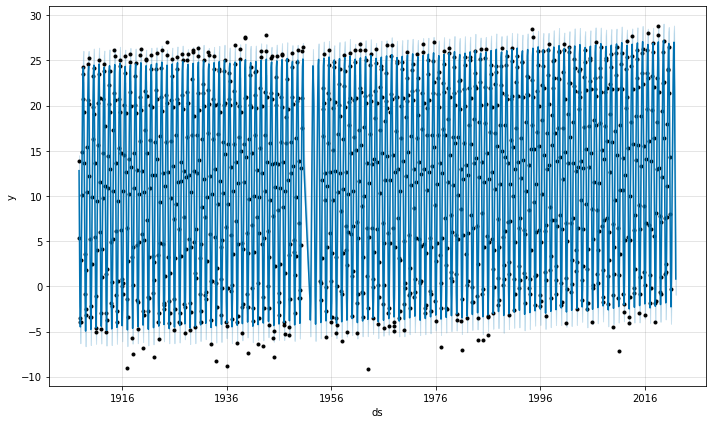

In [82]:
model.plot(prediction);

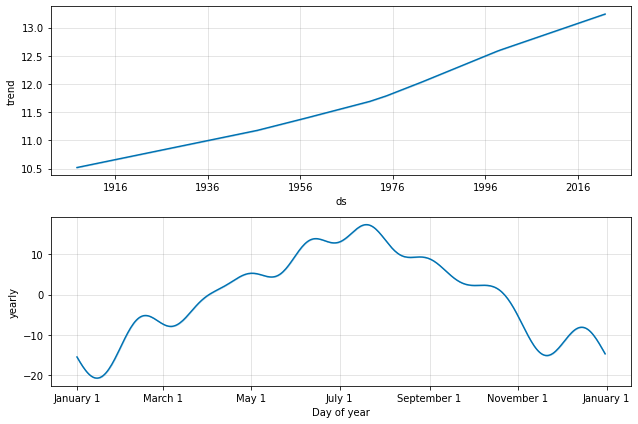

In [83]:
model.plot_components(prediction);